/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 0.9667


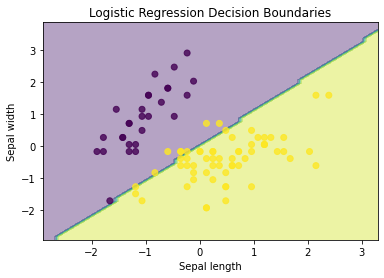

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Cost function
def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h))

# Gradient computation
def gradient(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

# Logistic regression function
def logistic_regression(X, y, num_iterations, learning_rate):
    # Initialize weights
    weights = np.zeros(X.shape[1])
    
    for i in range(num_iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient_val = gradient(X, h, y)
        
        weights -= learning_rate * gradient_val
    
    return weights

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features (sepal length and width)
y = (iris.target != 0) * 1  # make problem binary for simplicity

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Perform logistic regression
weights = logistic_regression(X_train_std, y_train, num_iterations=200, learning_rate=0.1)

# Make predictions
y_pred = sigmoid(np.dot(X_test_std, weights)) > 0.5

# Print accuracy
print('Accuracy: %.4f' % np.mean(y_pred == y_test))

# Plot decision boundary
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights)) > 0.5
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, alpha=0.8)
plt.title('Logistic Regression Decision Boundaries')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.savefig('plot.png')